In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from astropy import constants as const
from astropy import units as u## density at t_0## fit at t_end

## Plot density across raadius at times t0, tForm/2, tForm and tend

In [2]:
def my_plotter(axs, data1, data2, xylabels, **param_dict):
    
    #A helper function to make a graph

    #Parameters
    #----------
    #ax : Axes
    #    The axes to draw to

    #data1 : array
    #   The x data

    #data2 : array
    #   The y data

    #param_dict : dict
    #   Dictionary of kwargs to pass to ax.plot
    
    axs.loglog(data1, data2, **param_dict)
    axs.set_xlabel(xylabels[0])
    
    
    from matplotlib.ticker import FuncFormatter
    
    for axis in [axs.xaxis]:
        formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
        axis.set_major_formatter(formatter)
        
    leg = plt.legend(loc=0, frameon=1, handlelength=5)
    frame = leg.get_frame()
    frame.set_facecolor("floralwhite")

    return

### time unit calculation

In [3]:
timeUnit = (const.pc ** 3 / (const.G) / const.M_sun) ** (0.5)
print("The unit of time is ", timeUnit)

The unit of time is  470511237952942.7 s


## Multiplot of three fit at t_end plots

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


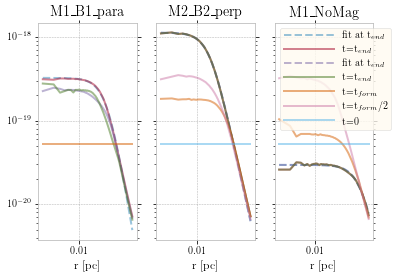

In [5]:
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.style.use("bmh")
plt.style.use(
    {
        "axes.facecolor": "white",
        "xtick.direction": "out",
        "ytick.direction": "out",
        "xtick.top": "True",
        "ytick.right": "True",
    }
)
fig, axs = plt.subplots(1, 3, sharey=True)





xylabels = ["r [pc]", r"$\rho$ [g cm$^{-3}$]"]


################################################################################################
axs[0].set_title('M1\_B1\_para')

# begin_fit_at_tend

x_data_0, density_0 = np.loadtxt(
    "./density_across_r_plot/4_density_tend_0",
    unpack=True,
    usecols=(0, 1),
)

from scipy import optimize

def fit_func(r, density_c, Rflat, P):
    return density_c / (1 + (r / Rflat)**2)**(P/2)

#job14
#y_data = fit_func(x_data, density_c = 7.61661679466644e-17, Rflat = 0.001, P = 2)

# Add noise from a Gaussian distribution
#noise = 0.01*np.random.normal(size=y_data.size)
#y_data = y_data + noise

params, params_covariance = optimize.curve_fit(fit_func, x_data_0, density_0, p0 = [575e-19  ,   0.0039   , 1.9], maxfev=40000)


#print(params)

kwargs = {"label": "fit at t$_{end}$", "alpha": 0.5}
my_plotter(axs[0], x_data_0, fit_func(x_data_0, *params), xylabels, **kwargs, linestyle='dashed')

kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
my_plotter(axs[0], x_data_0, density_0, xylabels, **kwargs)

# end_fit_at_tend




# initial density of filament
filamentM = 37
filamentM = filamentM * u.solMass  # mass
filamentL = 1.5 * u.pc  # length
filamentR = 0.1 * u.pc  # radius
filamentV = math.pi * filamentR ** 2.0 * filamentL
filamentDens = filamentM / filamentV
filamentDens = filamentDens.decompose(u.cgs.bases)  # density in cgs
#print("Initial filament density", filamentDens)

r0_0, density0_0 = np.loadtxt(
    "./density_across_r_plot/1_density_t0_overall_0", usecols=(0, 1), unpack=True
)

# We change density0 with the initial density of filament to have a smooth line

density0_0 = np.full(r0_0.size, filamentDens.value)
#print(density0.shape, r0.shape)

r1_0, density1_0 = np.loadtxt(
    "./density_across_r_plot/2_density_half_tform_0",
    unpack=True,
    usecols=(0, 1),
)

r2_0, density2_0 = np.loadtxt(
    "./density_across_r_plot/3_density_tform_0",
    unpack=True,
    usecols=(0, 1),
)


kwargs = {"label": "t=t$_{form}$", "alpha": 0.5}
my_plotter(axs[0], r2_0, density2_0, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$/2", "alpha": 0.5}
my_plotter(axs[0], r1_0, density1_0, xylabels, **kwargs)

kwargs = {"label": "t=0", "alpha": 0.5}
my_plotter(axs[0], r0_0, density0_0, xylabels, **kwargs)

######################################################################################################

axs[1].set_title('M2\_B2\_perp')

# begin_fit_at_tend

x_data_1, density_1 = np.loadtxt(
    "./density_across_r_plot/4_density_tend_1",
    unpack=True,
    usecols=(0, 1),
)

from scipy import optimize

def fit_func(r, density_c, Rflat, P):
    return density_c / (1 + (r / Rflat)**2)**(P/2)

#job14
#y_data = fit_func(x_data, density_c = 7.61661679466644e-17, Rflat = 0.001, P = 2)

# Add noise from a Gaussian distribution
#noise = 0.01*np.random.normal(size=y_data.size)
#y_data = y_data + noise

params, params_covariance = optimize.curve_fit(fit_func, x_data_1, density_1, p0 = [575e-19  ,   0.0039   , 1.9], maxfev=40000)


#print(params)

kwargs = {"label": "fit at t$_{end}$", "alpha": 0.5}
my_plotter(axs[1], x_data_1, fit_func(x_data_1, *params), xylabels, **kwargs, linestyle='dashed')

kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
my_plotter(axs[1], x_data_1, density_1, xylabels, **kwargs)

# end_fit_at_tend



# initial density of filament

filamentM = 37
filamentM = filamentM * u.solMass  # mass
filamentL = 1.5 * u.pc  # length
filamentR = 0.1 * u.pc  # radius
filamentV = math.pi * filamentR ** 2.0 * filamentL
filamentDens = filamentM / filamentV
filamentDens = filamentDens.decompose(u.cgs.bases)  # density in cgs
#print("Initial filament density", filamentDens)

r0_1, density0_1 = np.loadtxt(
    "./density_across_r_plot/1_density_t0_overall_1", usecols=(0, 1), unpack=True
)

# We change density0 with the initial density of filament to have a smooth line

density0_1 = np.full(r0_1.size, filamentDens.value)
#print(density0.shape, r0.shape)

r1_1, density1_1 = np.loadtxt(
    "./density_across_r_plot/2_density_half_tform_1",
    unpack=True,
    usecols=(0, 1),
)

r2_1, density2_1 = np.loadtxt(
    "./density_across_r_plot/3_density_tform_1",
    unpack=True,
    usecols=(0, 1),
)

kwargs = {"label": "fit at t$_{end}$", "alpha": 0.5}
my_plotter(axs[1], x_data_1, fit_func(x_data_1, *params), xylabels, **kwargs, linestyle='dashed')

kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
my_plotter(axs[1], x_data_1, density_1, xylabels, **kwargs)

# end_fit_at_tend

#kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
#my_plotter(ax, r3, density3, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$", "alpha": 0.5}
my_plotter(axs[1], r2_1, density2_1, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$/2", "alpha": 0.5}
my_plotter(axs[1], r1_1, density1_1, xylabels, **kwargs)

kwargs = {"label": "t=0", "alpha": 0.5}
my_plotter(axs[1], r0_1, density0_1, xylabels, **kwargs)

#######################################################################################################

axs[2].set_title('M1\_NoMag')



# begin_fit_at_tend

x_data_2, density_2 = np.loadtxt(
    "./density_across_r_plot/4_density_tend_2",
    unpack=True,
    usecols=(0, 1),
)

from scipy import optimize

def fit_func(r, density_c, Rflat, P):
    return density_c / (1 + (r / Rflat)**2)**(P/2)

#job14
#y_data = fit_func(x_data, density_c = 7.61661679466644e-17, Rflat = 0.001, P = 2)

# Add noise from a Gaussian distribution
#noise = 0.01*np.random.normal(size=y_data.size)
#y_data = y_data + noise

params, params_covariance = optimize.curve_fit(fit_func, x_data_2, density_2, p0 = [575e-19  ,   0.0039   , 1.9], maxfev=40000)


#print(params)

kwargs = {"label": "fit at t$_{end}$", "alpha": 0.5}
my_plotter(axs[2], x_data_2, fit_func(x_data_2, *params), xylabels, **kwargs, linestyle='dashed')

kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
my_plotter(axs[2], x_data_2, density_2, xylabels, **kwargs)

# end_fit_at_tend



# initial density of filament

filamentM = 37
filamentM = filamentM * u.solMass  # mass
filamentL = 1.5 * u.pc  # length
filamentR = 0.1 * u.pc  # radius
filamentV = math.pi * filamentR ** 2.0 * filamentL
filamentDens = filamentM / filamentV
filamentDens = filamentDens.decompose(u.cgs.bases)  # density in cgs
#print("Initial filament density", filamentDens)

r0_2, density0_2 = np.loadtxt(
    "./density_across_r_plot/1_density_t0_overall_2", usecols=(0, 1), unpack=True
)

# We change density0 with the initial density of filament to have a smooth line

density0_2 = np.full(r0_2.size, filamentDens.value)
#print(density0.shape, r0.shape)

r1_2, density1_2 = np.loadtxt(
    "./density_across_r_plot/2_density_half_tform_2",
    unpack=True,
    usecols=(0, 1),
)

r2_2, density2_2 = np.loadtxt(
    "./density_across_r_plot/3_density_tform_2",
    unpack=True,
    usecols=(0, 1),
)

kwargs = {"label": "fit at t$_{end}$", "alpha": 0.5}
my_plotter(axs[2], x_data_2, fit_func(x_data_2, *params), xylabels, **kwargs, linestyle='dashed')

kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
my_plotter(axs[2], x_data_2, density_2, xylabels, **kwargs)

# end_fit_at_tend

#kwargs = {"label": "t=t$_{end}$", "alpha": 0.5}
#my_plotter(ax, r3, density3, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$", "alpha": 0.5}
my_plotter(axs[2], r2_2, density2_2, xylabels, **kwargs)

kwargs = {"label": "t=t$_{form}$/2", "alpha": 0.5}
my_plotter(axs[2], r1_2, density1_2, xylabels, **kwargs)

kwargs = {"label": "t=0", "alpha": 0.5}
my_plotter(axs[2], r0_2, density0_2, xylabels, **kwargs)

########################################################################################################

plt.savefig("./density_across_r_plot/multiplot_fit_at_tend.png", dpi=400, bbox_inches="tight")

#plt.savefig("./density_across_r_plot/density_across_r.png", dpi=400, bbox_inches="tight")
